In [127]:
import pandas as pd
train_df = pd.read_csv('./datasets/human_train.csv')
test_df = pd.read_csv('./datasets/human_test.csv')

In [128]:
test_df.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [88]:
train_df.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [89]:
train_df['Activity'].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [90]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [91]:
train_df.isnull().sum().unique()

array([0], dtype=int64)

In [93]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import numpy as np
encoder = LabelEncoder()
train_df['Labels'] = encoder.fit_transform(train_df['Activity'])

In [94]:
train_df.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Labels
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085,2.315152
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143,1.690628
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,0.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000,1.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000,2.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000,5.000000


In [95]:
train_df.index

RangeIndex(start=0, stop=7352, step=1)

In [117]:
train_df = train_df.loc[:, ~train_df.columns.duplicated(keep='first')]

In [118]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 564 entries, tBodyAcc-mean()-X to Labels
dtypes: float64(561), int32(1), int64(1), object(1)
memory usage: 31.6+ MB


In [119]:
train_df.head(1)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,Labels
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.0304,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING,2


In [96]:
df = pd.DataFrame(train_df.columns, columns=['column_name'])

In [97]:
df.head()

,column_name
0,tBodyAcc-mean()-X
1,tBodyAcc-mean()-Y
2,tBodyAcc-mean()-Z
3,tBodyAcc-std()-X
4,tBodyAcc-std()-Y


In [98]:
df['column_index'] = range(1, 565)

In [99]:
df.tail()

,column_name,column_index
559,"angle(Y,gravityMean)",560
560,"angle(Z,gravityMean)",561
561,subject,562
562,Activity,563
563,Labels,564


In [100]:
feature_name = df.iloc[:, 0].values.tolist()
print(feature_name[:10])

['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [101]:
feature_dup_df = df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    0
dtype: int64


,column_index
column_name,


In [102]:
import numpy as np

X_train = train_df.drop(['Activity', 'Labels', 'subject'], axis=1)
y_train = train_df['Labels']

X_test = train_df.drop(['Activity','subject'] axis=1)
y_test = LabelEncoder().fit_transform(train_df['Activity'])

In [103]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [104]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [105]:
ftr_importances = pd.Series(dt.feature_importances_, index=X_train.columns)

In [107]:
train_df[ftr_importances.sort_values(ascending=False)[:10].index]

,tGravityAcc-min()-X,"fBodyAccJerk-bandsEnergy()-1,16","angle(Y,gravityMean)",fBodyAccMag-energy(),"tGravityAcc-arCoeff()-Z,2",fBodyGyro-maxInds-X,"tBodyGyro-correlation()-Y,Z",tGravityAcc-energy()-Y,tGravityAccMag-arCoeff()1,tBodyGyro-max()-X
0,0.977436,-0.999982,0.179941,-0.998285,0.995675,-1.000000,0.301099,-0.970905,-0.173179,-0.867044
1,0.984520,-0.999987,0.180289,-0.999472,0.834271,-1.000000,0.169395,-0.970583,0.081569,-0.864904
2,0.986770,-0.999963,0.180637,-0.999807,0.714392,-1.000000,-0.350646,-0.970368,0.038049,-0.864904
3,0.986821,-0.999978,0.181935,-0.999770,0.386373,-1.000000,-0.725301,-0.969400,-0.092856,-0.885320
4,0.987434,-0.999988,0.185151,-0.999873,0.239268,-1.000000,-0.724558,-0.967051,0.180441,-0.870154
...,...,...,...,...,...,...,...,...,...,...
7347,0.920554,-0.775736,0.238604,-0.584282,0.802503,-1.000000,0.337338,-0.918375,-0.617906,-0.414164
7348,0.920554,-0.780751,0.252676,-0.632536,0.721749,-0.933333,0.406319,-0.902880,-0.468825,-0.414164
7349,0.933008,-0.783616,0.249145,-0.641170,0.835444,-0.933333,0.483839,-0.907561,-0.492911,-0.519895
7350,0.933008,-0.821137,0.246432,-0.663579,0.858624,-0.933333,0.376823,-0.910648,-0.526184,-0.685665


In [111]:
X_train_feature_importances = ftr_importances.sort_values(ascending=False)[:10].index

In [120]:
from sklearn.metrics import accuracy_score
params = {
    'max_depth' : [8, 12, 16, 20],
    'min_samples_split' : [16, 24]
}
from sklearn.model_selection import GridSearchCV
grid_cv = GridSearchCV(dt, param_grid=params, cv=5, verbose=1)
grid_cv.fit(X_train[X_train_feature_importances], y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [8, 12, 16, 20],
                         'min_samples_split': [16, 24]},
             verbose=1)

In [121]:
best_dt = grid_cv.best_estimator_

In [122]:
best_dt

DecisionTreeClassifier(max_depth=8, min_samples_split=24, random_state=0)

In [123]:
pred = best_dt.predict(X_test[X_train_feature_importances])

In [124]:
from sklearn.metrics import accuracy_score , recall_score , precision_score , f1_score

set(pred)

{0, 1, 2, 3, 4, 5}

In [129]:
set(test_df['subject'])

{2, 4, 9, 10, 12, 13, 18, 20, 24}

In [130]:
set(y_test)

{0, 1, 2, 3, 4, 5}

In [131]:
accuracy_score(y_test , pred)

0.9557943416757345

In [132]:
recall_score(y_test , pred,average='macro')

0.9547789779392543

In [133]:
precision_score(y_test , pred,average='macro')

0.9552892511132941

In [134]:
f1_score(y_test , pred,average='macro')

0.9549611549733217

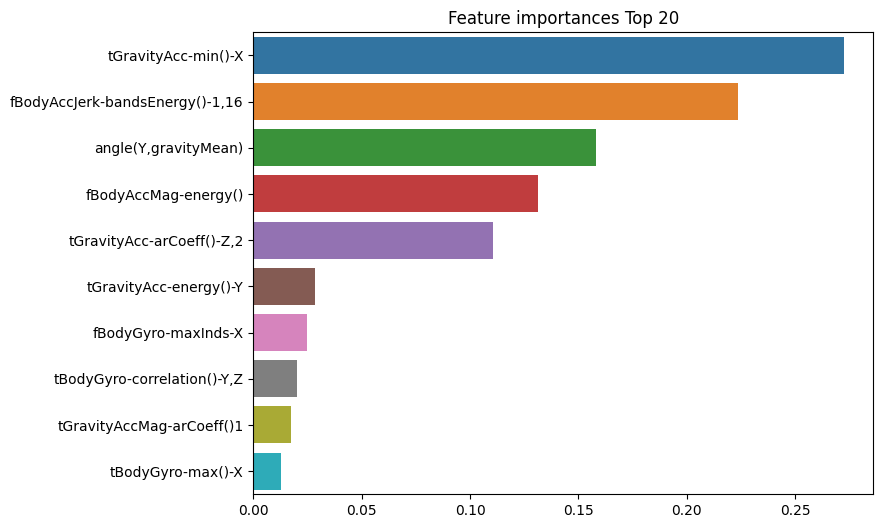

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt
ftr_importances_values = best_dt.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train[X_train_feature_importances].columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

<Axes: >

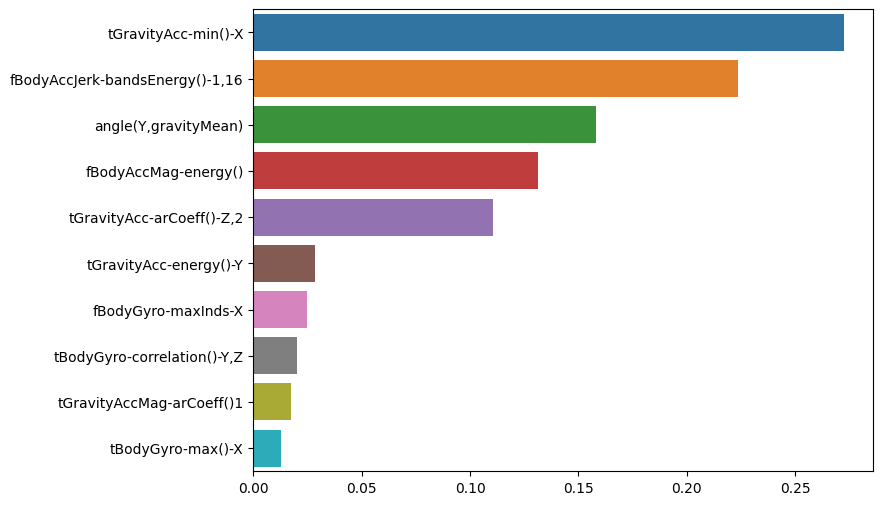

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.barplot(x = ftr_importances.sort_values(ascending=False)[:10] , y= ftr_importances.sort_values(ascending=False)[:10].index)